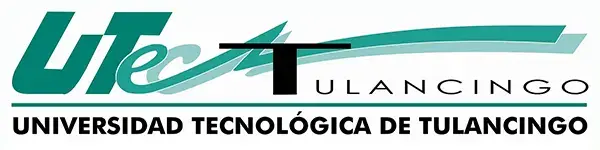




INGENIERÍA EN DESARROLLO Y GESTIÓN DE SOFTWARE

MATERIA: EXTRACCIÓN DE CONOCIMIENTOS DE BASE DE DATOS

NOMBRE DEL ALUMNO: VICTOR ALDAIR MARTINEZ GAYOSSO

NOMBRE DEL DOCENTE: SALVADOR HERNÁNDEZ MENDOZA

5.1 EMTRENAMIENTO NO SUPERVISADO

CUATRIMESTRE: 9º

GRUPO: IDGS-91

FECHA: 10 DE DICIEMBRE DE 2021

#PROBLEMA

Se tiene in conjunto de datos de erupciones de géisers y se desea clasificar para su estudio.
Los datos que se tiene son:

*   TimeEruption- tiempo de erupcion en minutos.
*   TimeWaiting- tiempo de espera para la siguiente erupcion.


# IMPORTAR LIBRERIAS

In [13]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# VERSIONES

In [7]:
print("Pandas {}".format(pd.__version__))
print("Tensorflow {}".format(tf.__version__))

Pandas 1.1.5
Tensorflow 2.7.0


# CARGAR EL DATASET

In [14]:
dataframe = pd.read_csv('geisers.csv')

# INFORMACION DEL DATAFRAME

In [15]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeEruption  272 non-null    float64
 1   TimeWaiting   272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [16]:
dataframe.head()

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [17]:
dataframe.describe()

,TimeEruption,TimeWaiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


# GRAFICAR EL DATAFRAME

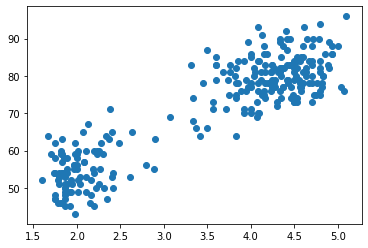

In [30]:
plt.scatter(dataframe['TimeEruption'],dataframe['TimeWaiting'])
plt.show()

#DATOS ALEATORIOS

In [69]:
TimeEruption = np.random.randint(100,size=100)
TimeWaiting = np.random.randint(100,size=100)

data = {
    'TimeEruption' : TimeEruption,
    'TimeWaiting' : TimeWaiting
}
dataframe_s = pd.DataFrame(data)

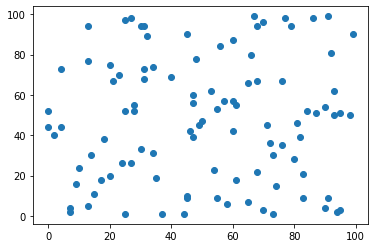

In [72]:
plt.scatter(dataframe_s['TimeEruption'],dataframe_s['TimeWaiting'])
plt.show()

#ENTRENAMIENTO

In [37]:
model.fit(dataframe)

KMeans(max_iter=100, n_clusters=3)

# CONFIGURAR MODELO

In [35]:
model = KMeans(n_clusters=3,max_iter=100)

# ESTANDARIZAR LOS DATOS

In [32]:
dataframe = StandardScaler().fit_transform(dataframe)

# CENTROIDES

In [38]:
centroids = model.cluster_centers_
centroids

array([[ 0.87916057,  0.95176708],
       [-1.27243544, -1.20871494],
       [ 0.49401042,  0.32754064]])

#VER LAS ETIQUETAS

In [39]:
model.labels_

array([2, 1, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0,
       2, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2,
       2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0,
       2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0,
       2, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 2,
       1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 0,
       1, 1, 2, 0, 1, 0, 1, 2], dtype=int32)

# GRAFICAR LOS CENTROIDES

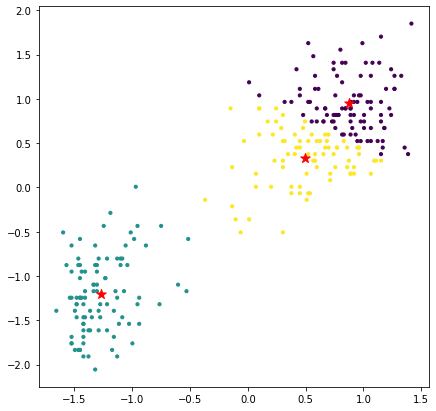

In [46]:
plt.figure(figsize=(7,7))
plt.scatter(dataframe[:,0],dataframe[:,1], c=model.labels_.astype(float),s=10,label='clusters')
plt.scatter(centroids[:,0],centroids[:,1], c='red', marker='*', s=100,label='centroids')
plt.show()

# PREDICIONES

In [49]:
new_label = model.predict([[-0.5,-1.5]])
new_label[0]


1

# SELECIONAR EL NUMERO DE CLUSTER

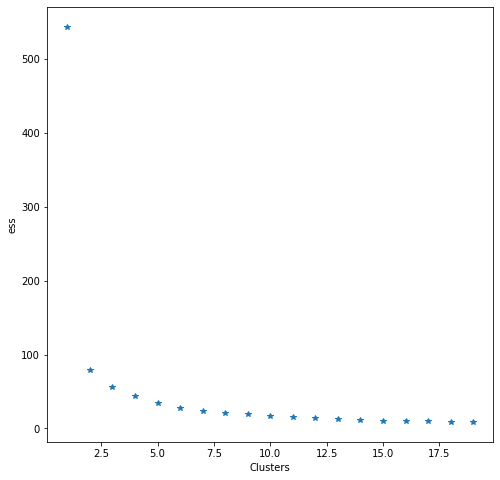

In [60]:
ess = [] # suma de los distancia al caudrado 
list_k = list(range(1,20))

for k in list_k:
  model =KMeans(n_clusters=k)
  model.fit(dataframe)
  ess.append(model.inertia_)

plt.figure(figsize=(8,8))
plt.plot(list_k,ess,'*')
plt.xlabel('Clusters')
plt.ylabel('ess')
plt.show()


#GRAFIXAR CON DISTINTOS CLUTERS

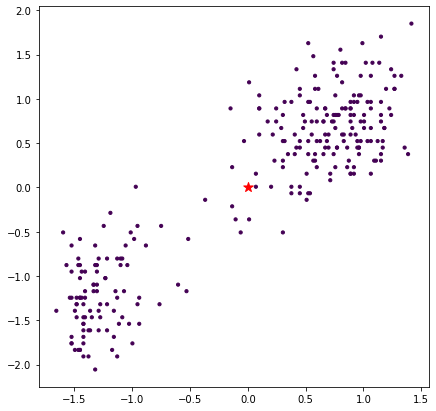

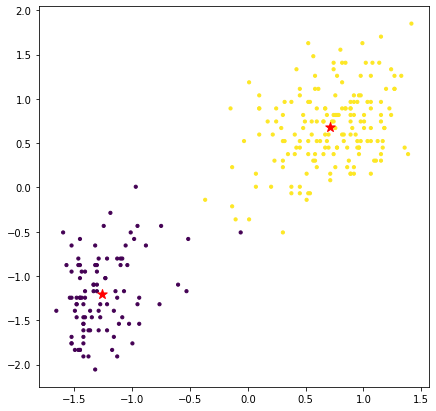

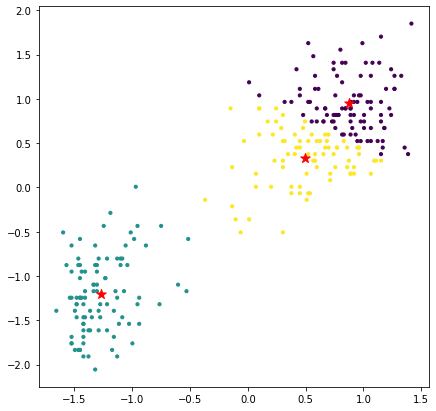

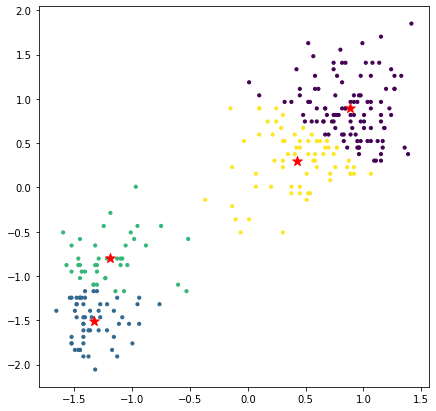

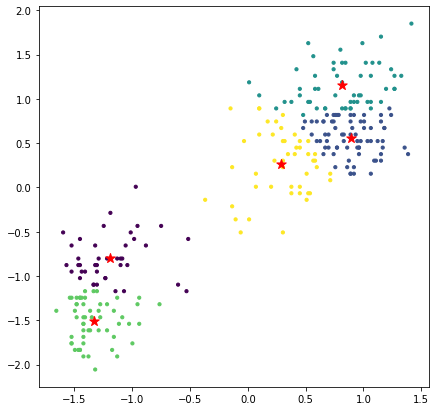

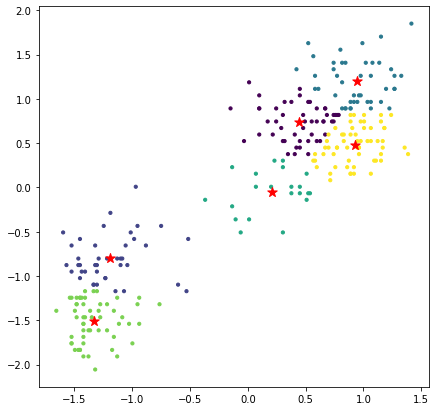

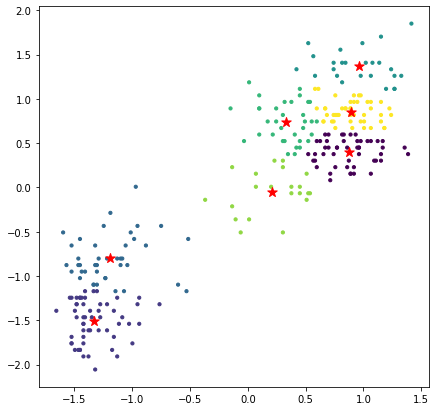

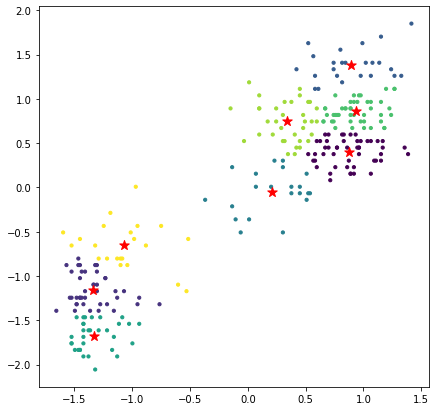

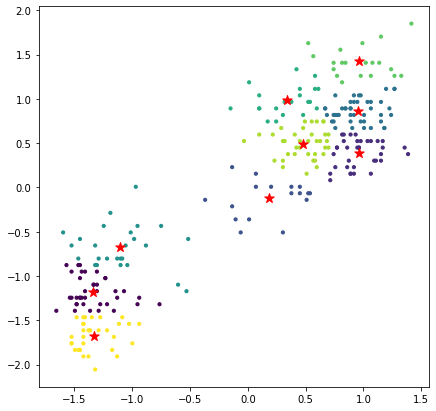

In [63]:
ess = [] # suma de los distancia al caudrado 
list_k = list(range(1,10))

for k in list_k:
  model =KMeans(n_clusters=k)
  model.fit(dataframe)
  ess.append(model.inertia_)
  centroids = model.cluster_centers_
  plt.figure(figsize=(7,7))
  plt.scatter(dataframe[:,0],dataframe[:,1], c=model.labels_.astype(float),s=10,label='clusters')
  plt.scatter(centroids[:,0],centroids[:,1], c='red', marker='*', s=100,label='centroids')
  plt.show()

Como conclusión se deduce que Google Colab facilita aún el procesamiento de la información y el compartirla con tus colaboradores. Además, tienes a tu servicio la capacidad de cómputo de Google, por lo que, si estás utilizando un equipo con pocos recursos, esta es la herramienta ideal para desarrollar tus algoritmos. Ademas, el somo crear un entrenamineto no supervisado ya que este te permiten realizar tareas de procesamiento más complejas en comparación con el Aprendizaje Supervisado. Sin embargo, el aprendizaje sin supervisión puede ser más impredecible en comparación con otros métodos de aprendizaje naturales.

